In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1809,2020-09-30,United Kingdom,443580.0,446156.0,42045.0,42072.0,-2576.0,-27.0
1810,2020-09-30,Germany,288520.0,289219.0,9478.0,9488.0,-699.0,-10.0
1811,2020-09-30,Iran,453031.0,453637.0,25990.0,25986.0,-606.0,4.0
1812,2020-09-30,Turkey,317044.0,317272.0,8118.0,8130.0,-228.0,-12.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  11520.868246968026
RMSE =  41515.928676823765


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  321.8853362734289
RMSE =  811.2378226211829


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  84905.52631578948
RMSE =  131398.04039534548
-- World performances for deaths --
MAE =  1938.6140350877192
RMSE =  2357.839472188085


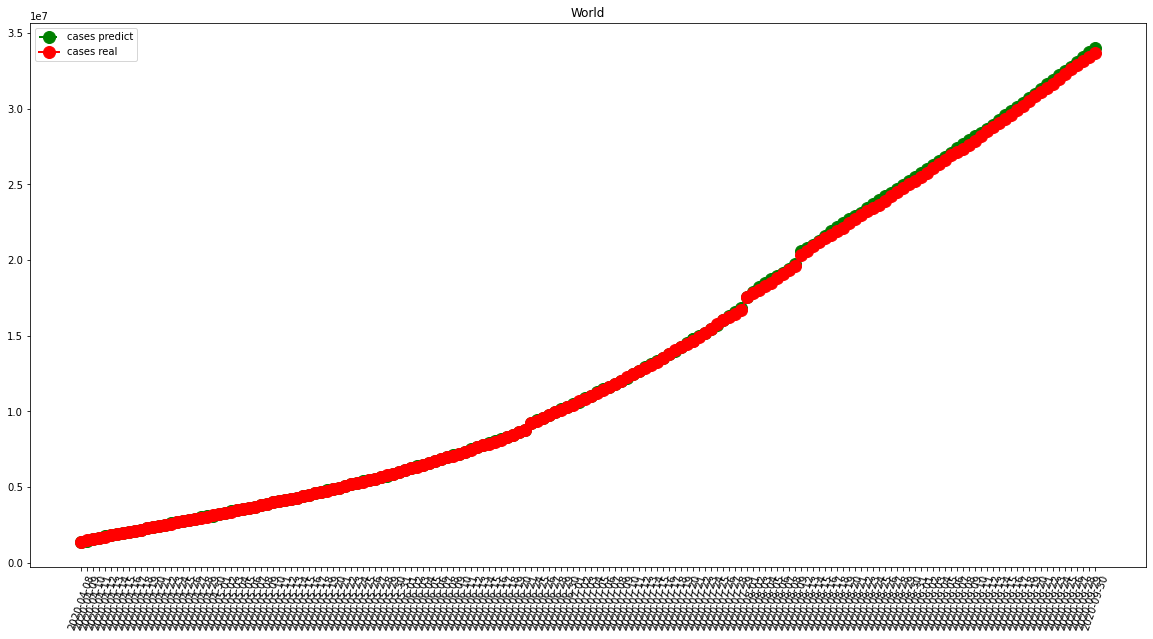

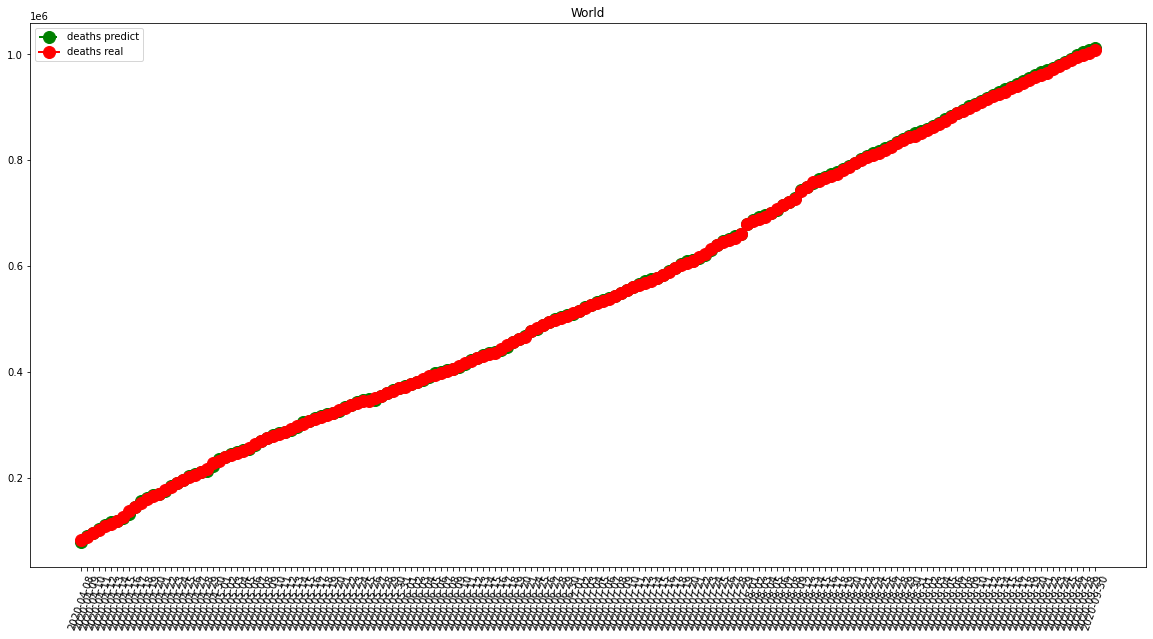

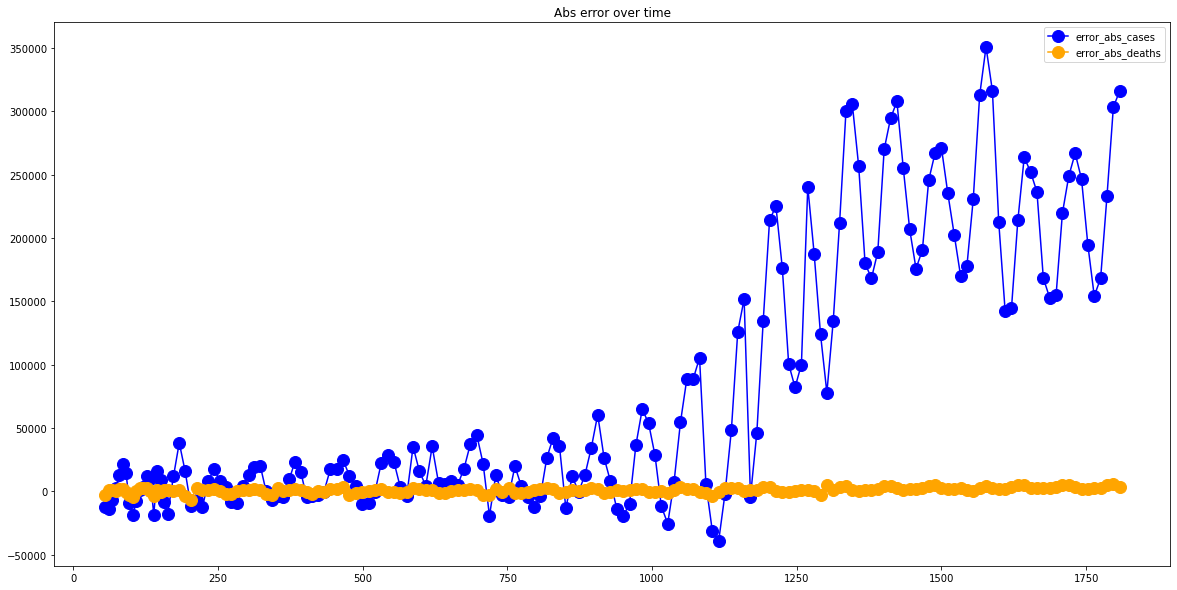

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1336.3480662983425
RMSE =  2091.1721408463563
-- France performances for deaths --
MAE =  108.66298342541437
RMSE =  250.0671512024265


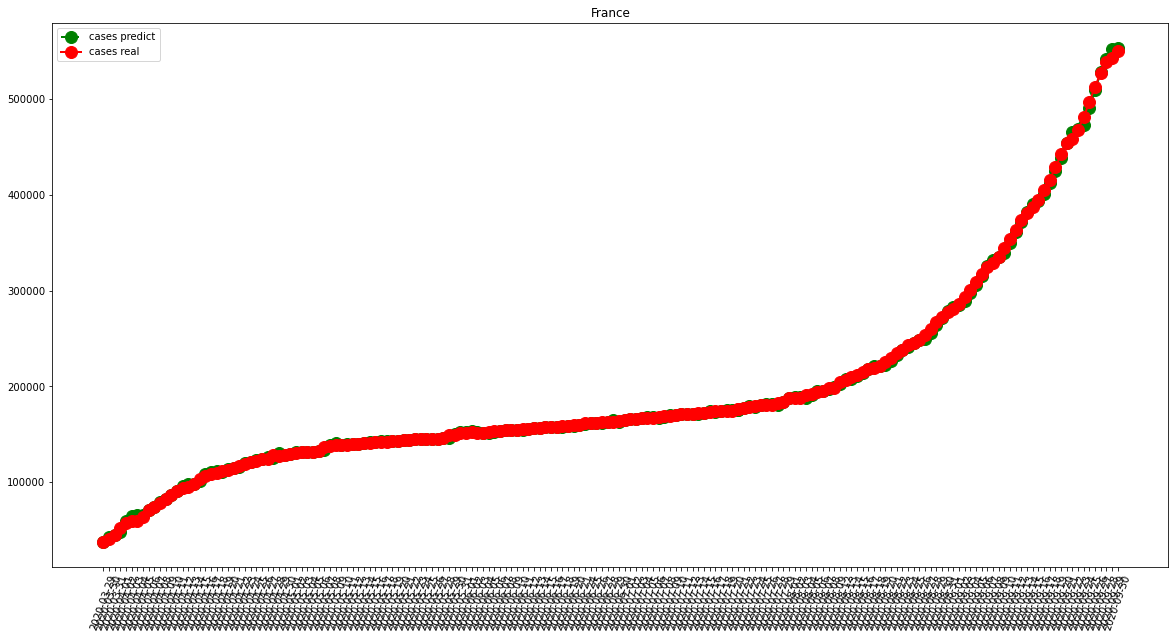

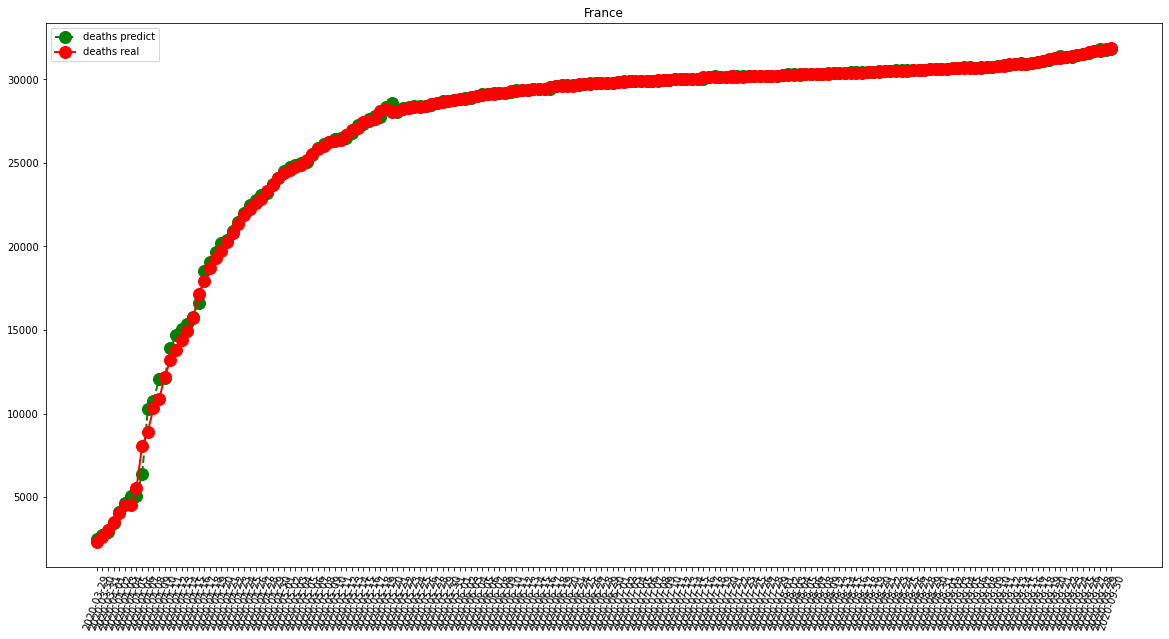

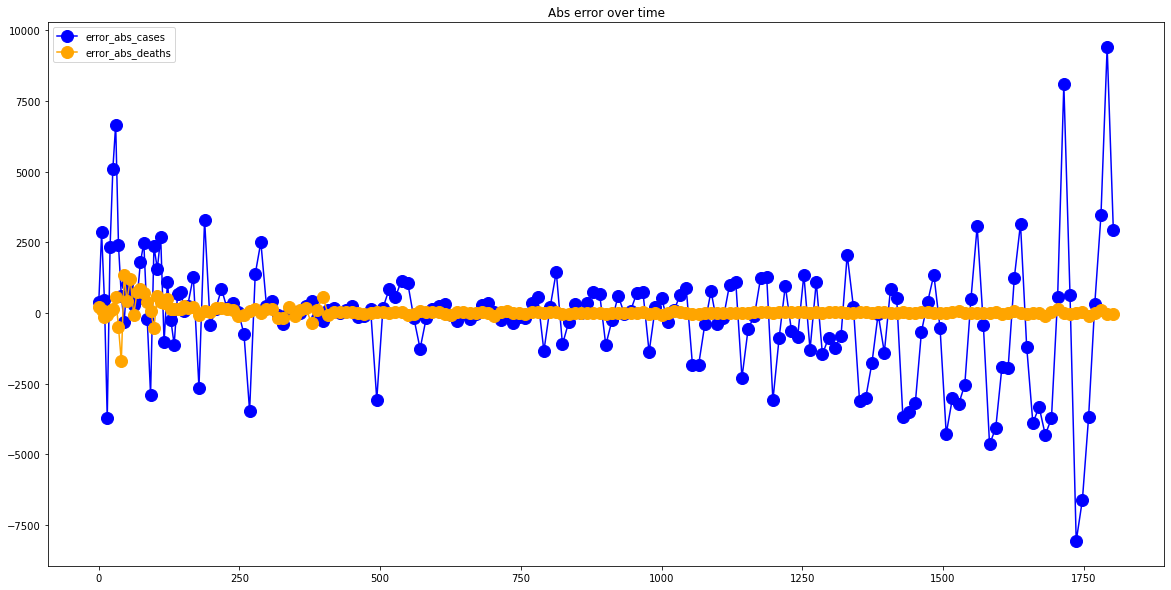

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  302.292817679558
RMSE =  441.42906427254013
-- Italy performances for deaths --
MAE =  64.11049723756906
RMSE =  220.74664861086382


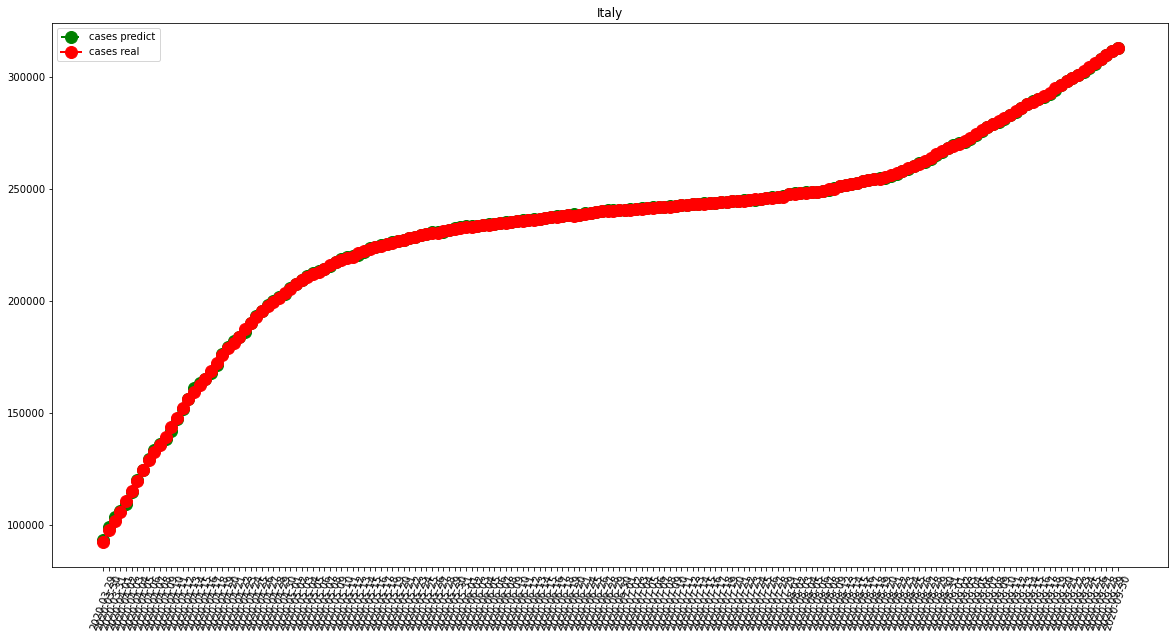

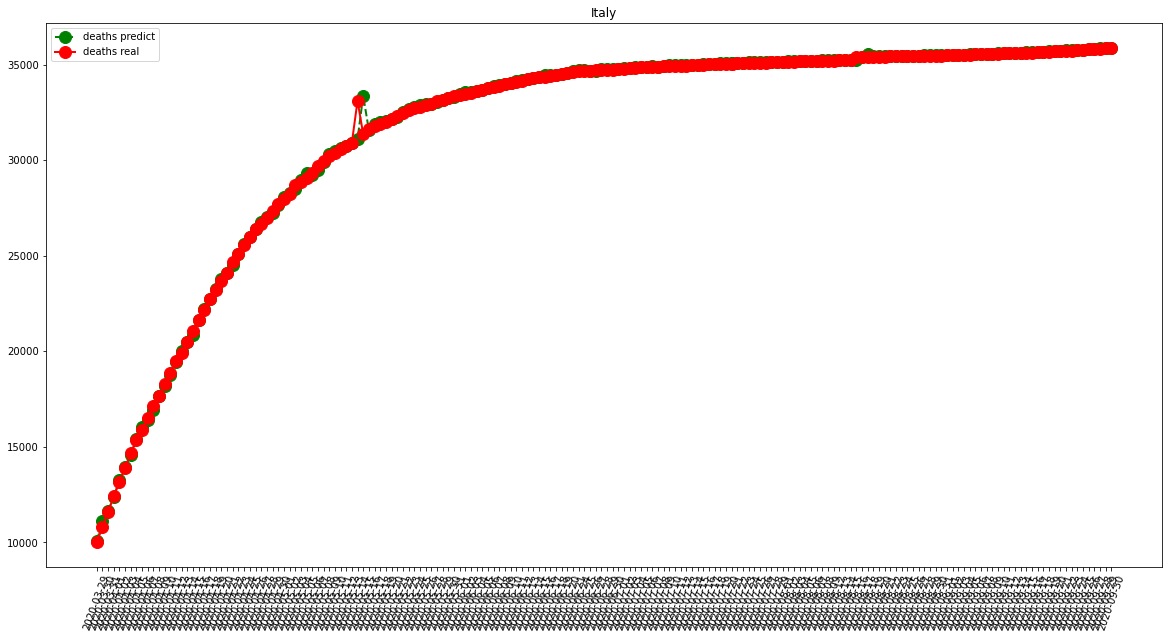

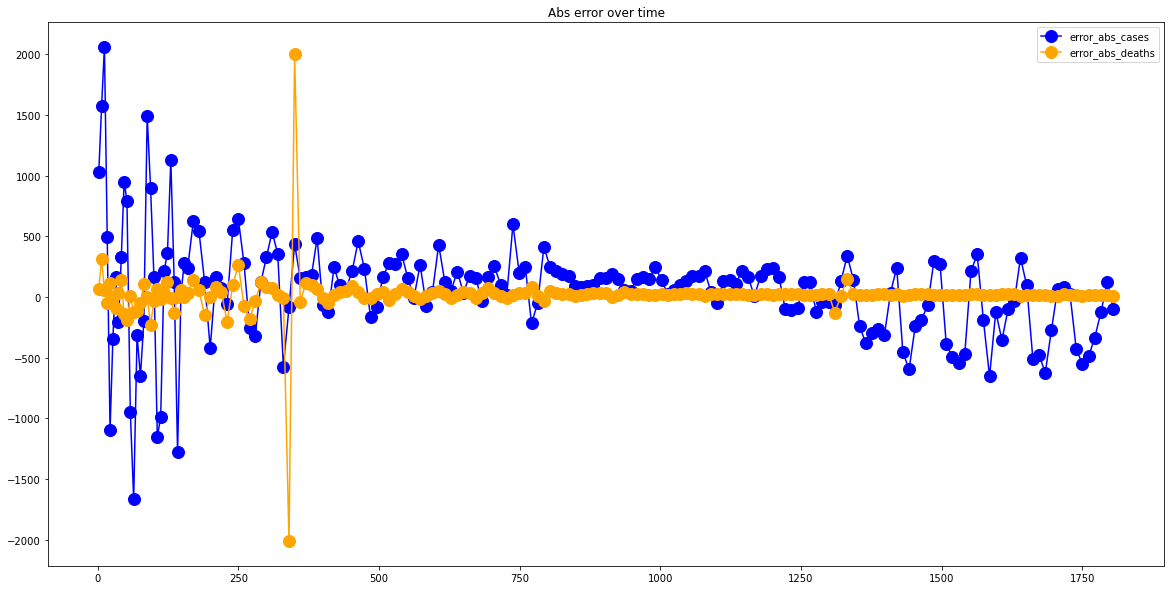

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2886.707182320442
RMSE =  5657.199557089115
-- Spain performances for deaths --
MAE =  119.92265193370166
RMSE =  304.9103300845434


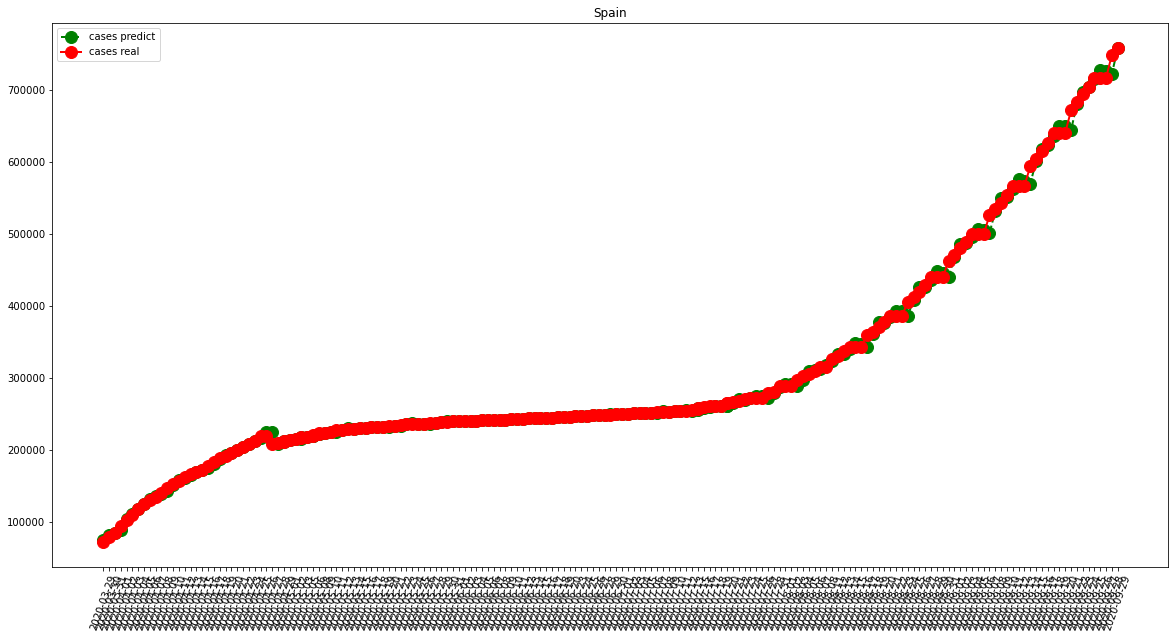

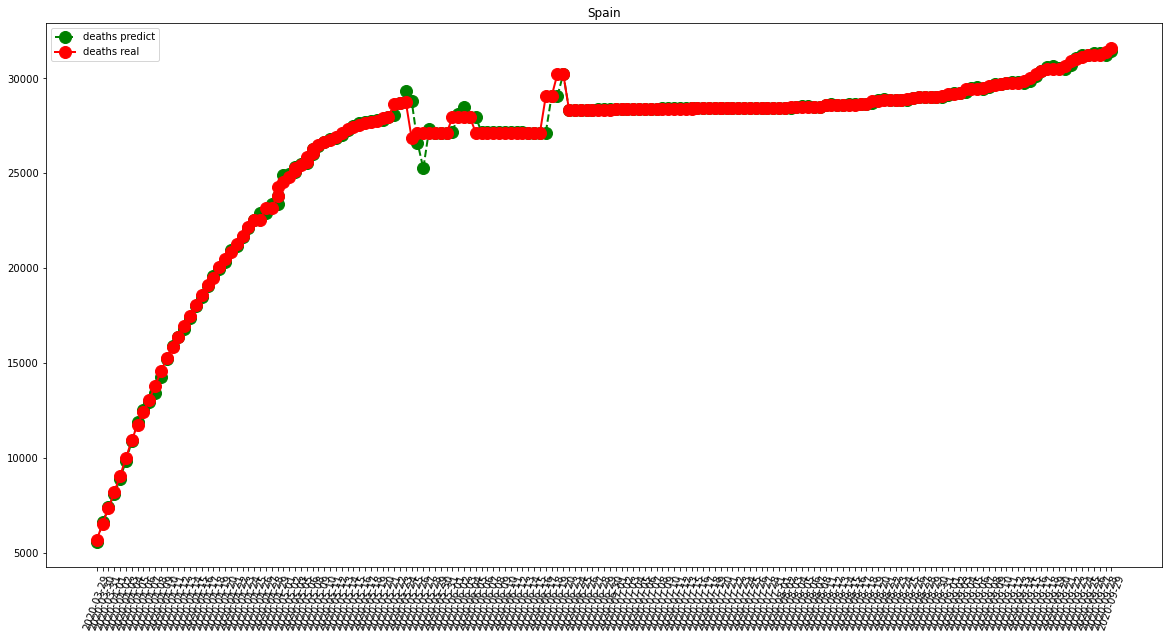

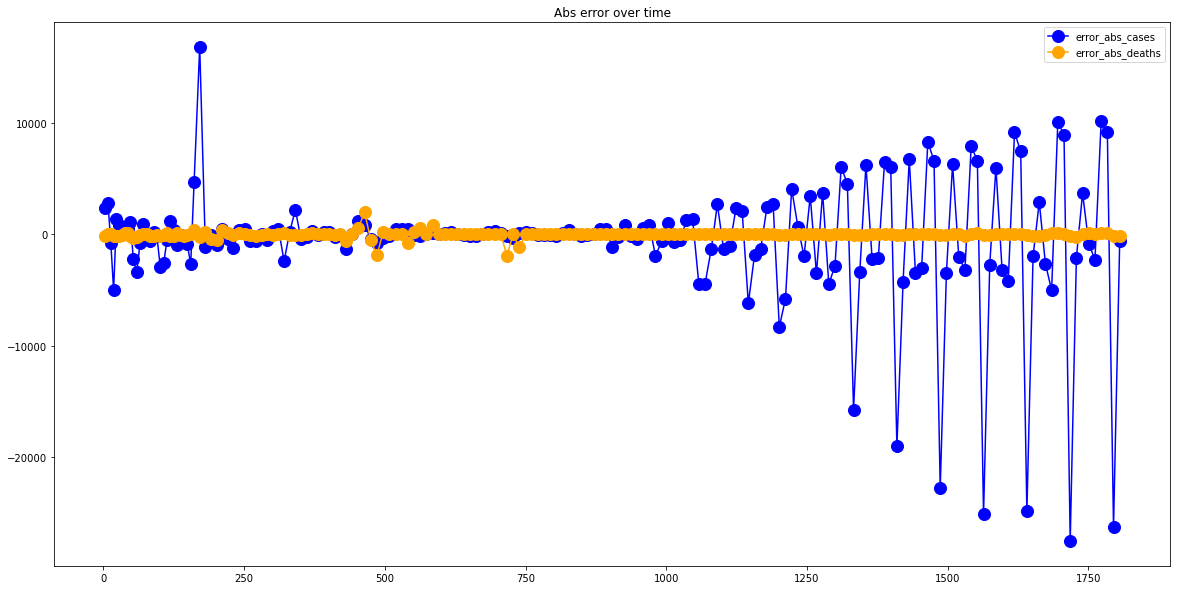

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  16373.309392265193
RMSE =  23684.228155471774
-- United States performances for deaths --
MAE =  480.11049723756906
RMSE =  668.760451459612


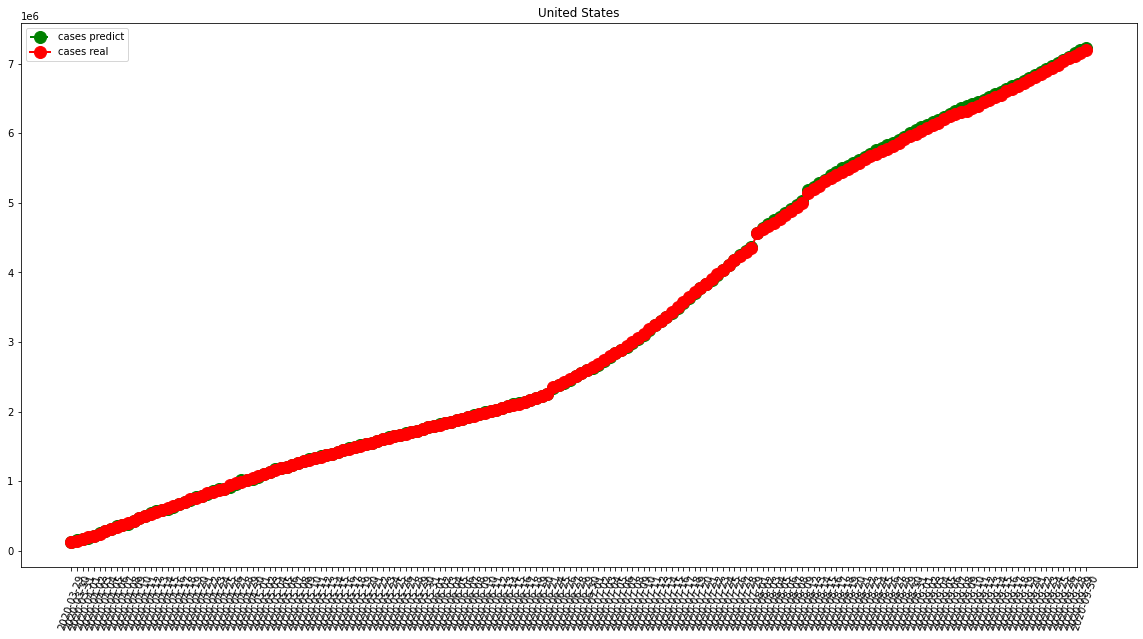

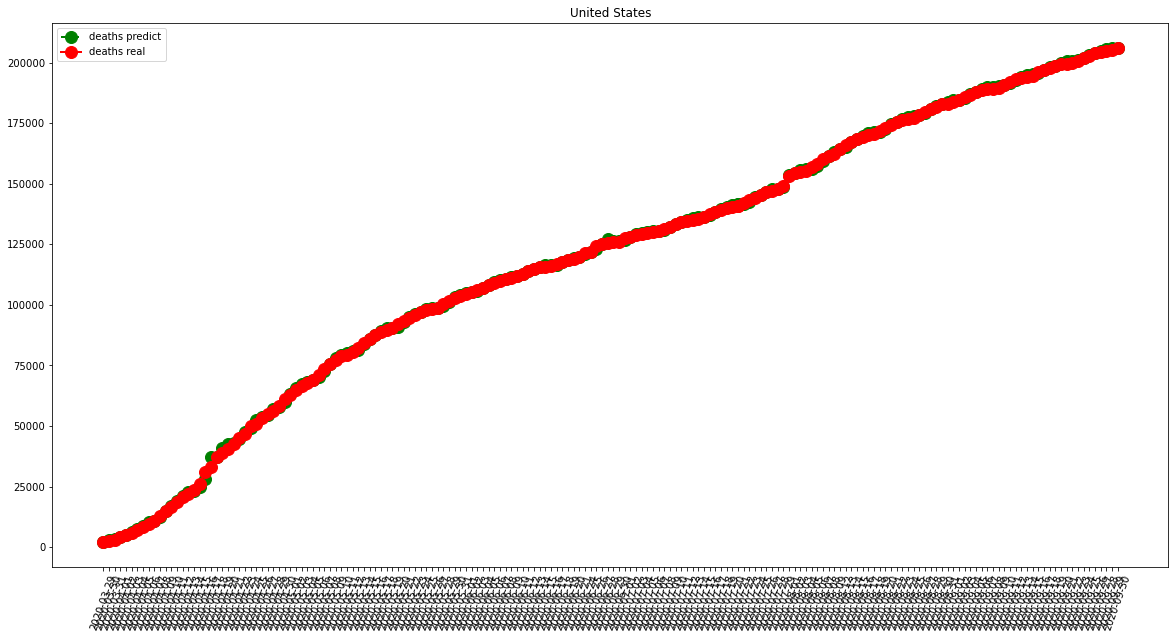

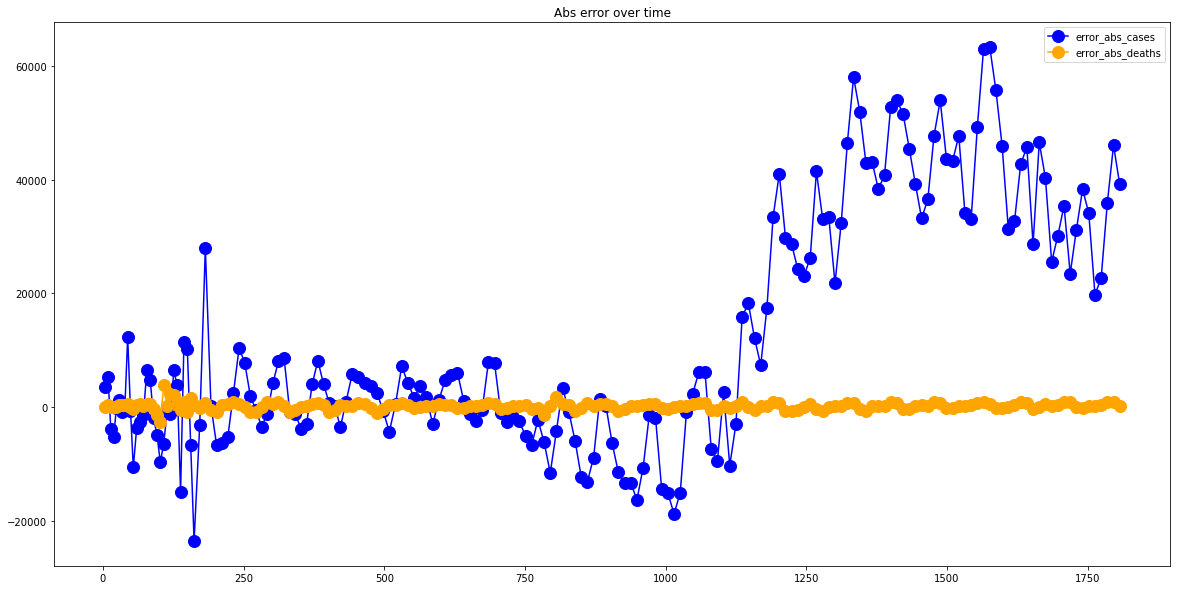

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  56.58563535911602
RMSE =  88.78230872500127
-- China performances for deaths --
MAE =  23.806629834254142
RMSE =  116.73161833124753


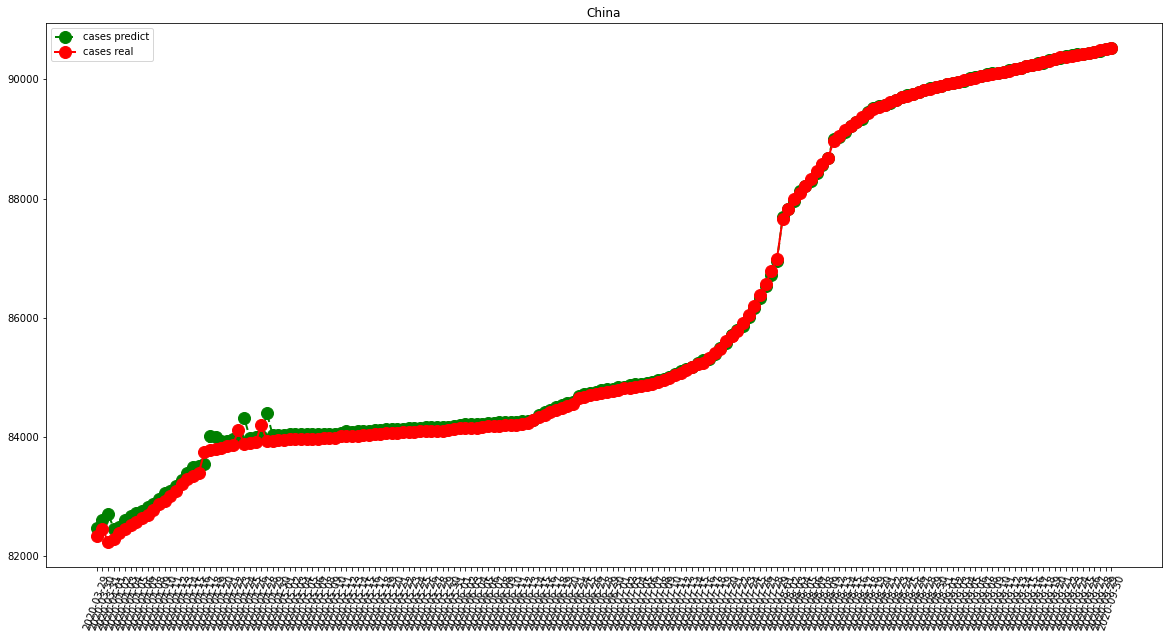

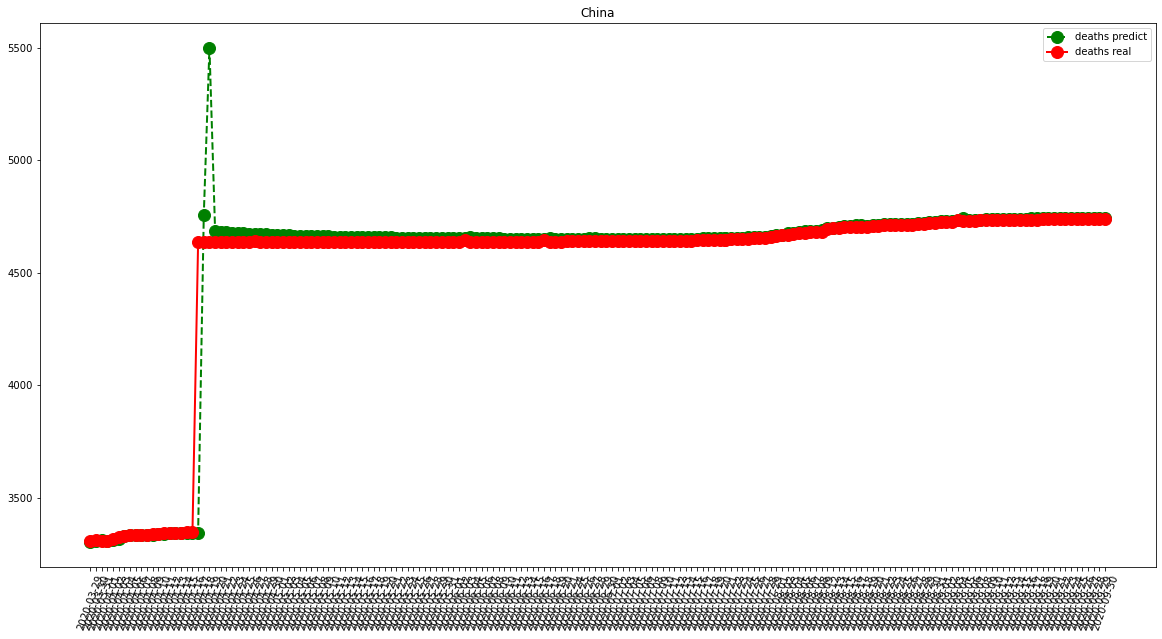

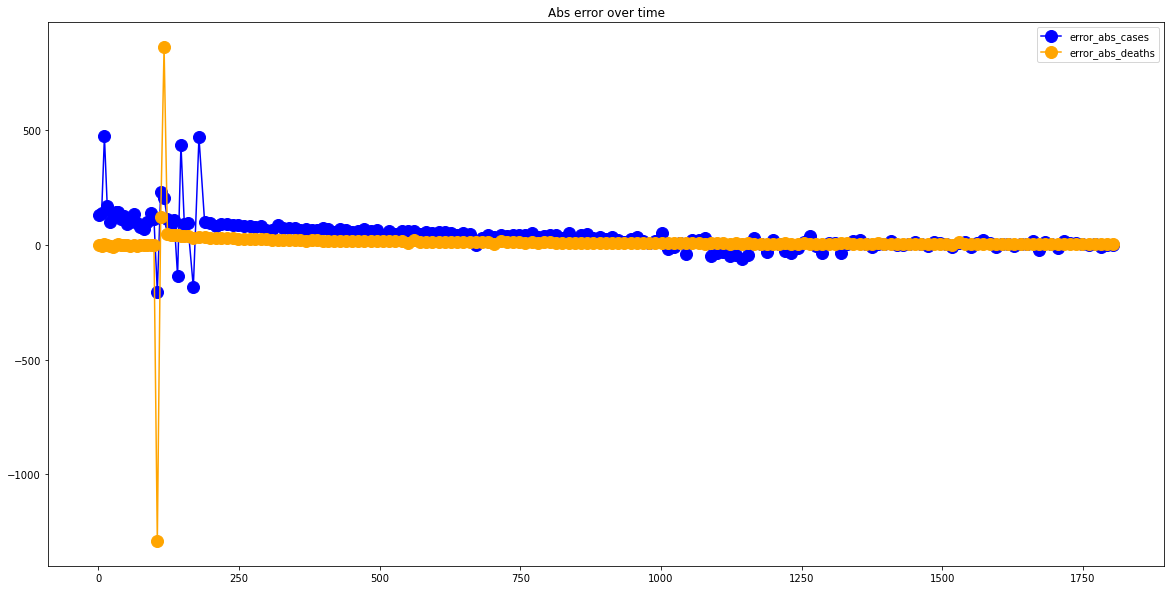

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1069.6797385620914
RMSE =  3435.74110603701
-- United Kingdom performances for deaths --
MAE =  203.0
RMSE =  690.0699547753547


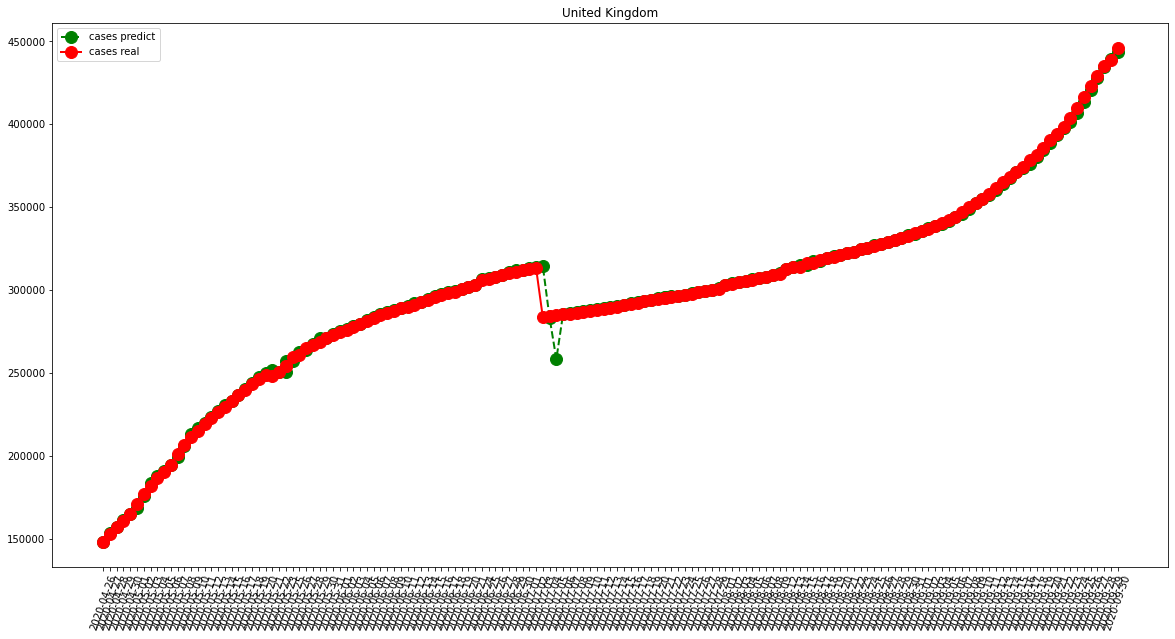

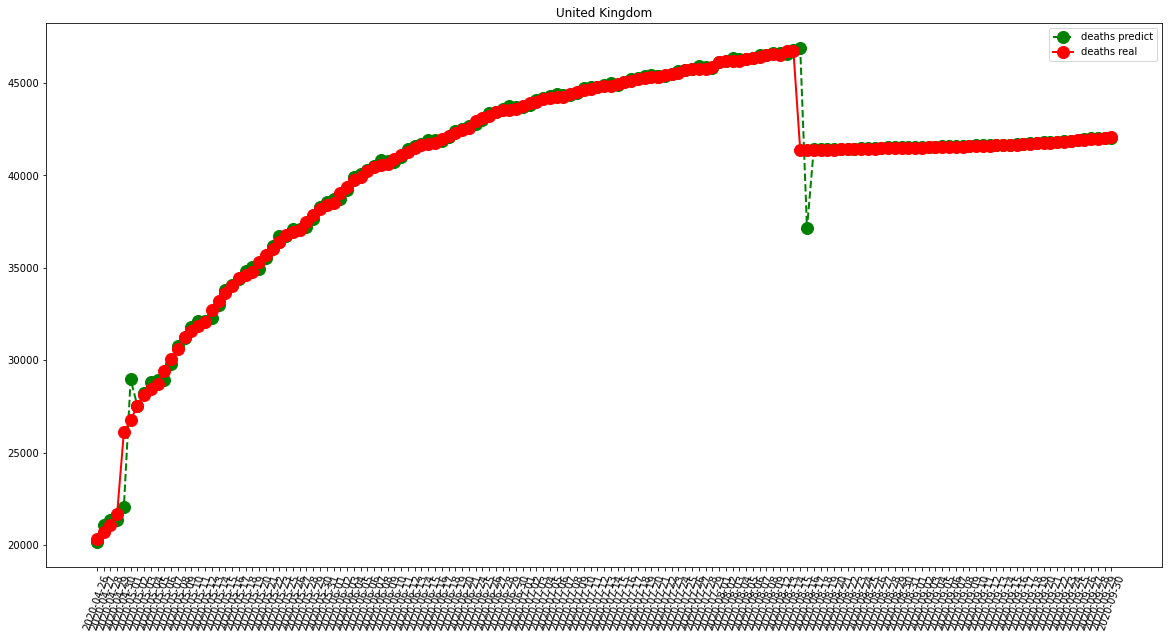

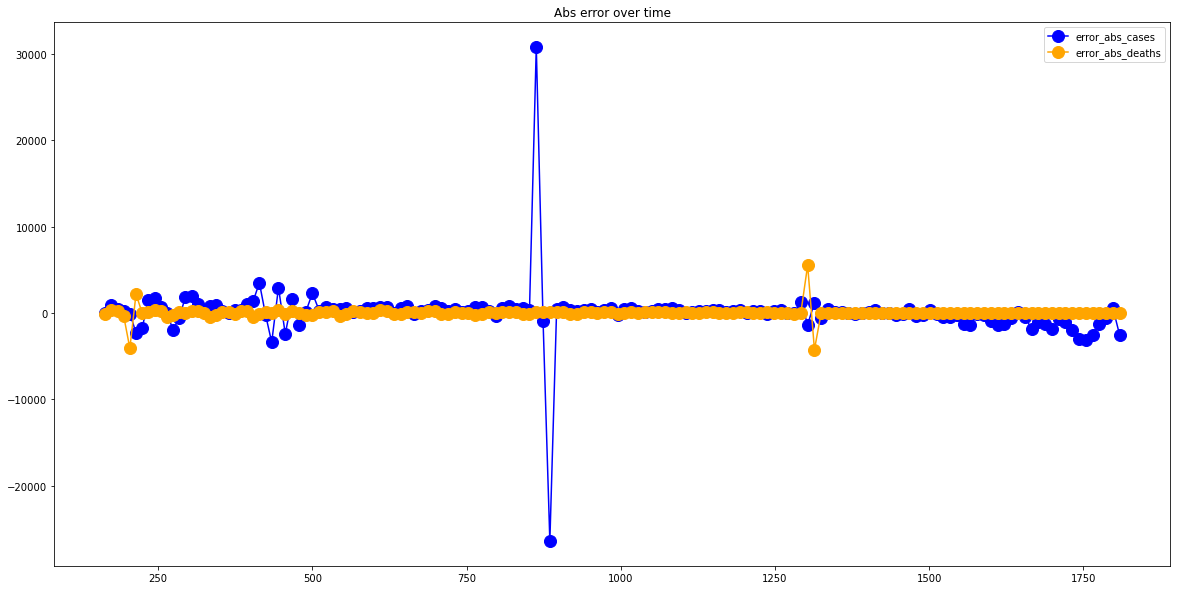

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  432.437908496732
RMSE =  593.9145368857231
-- Germany performances for deaths --
MAE =  18.26143790849673
RMSE =  35.68581124456899


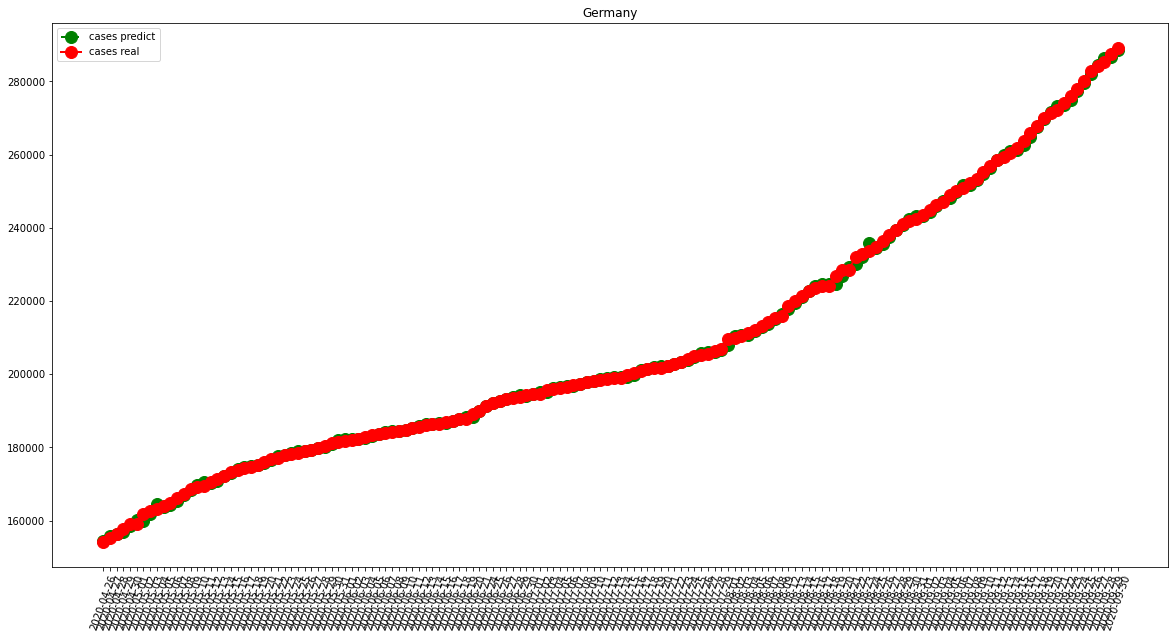

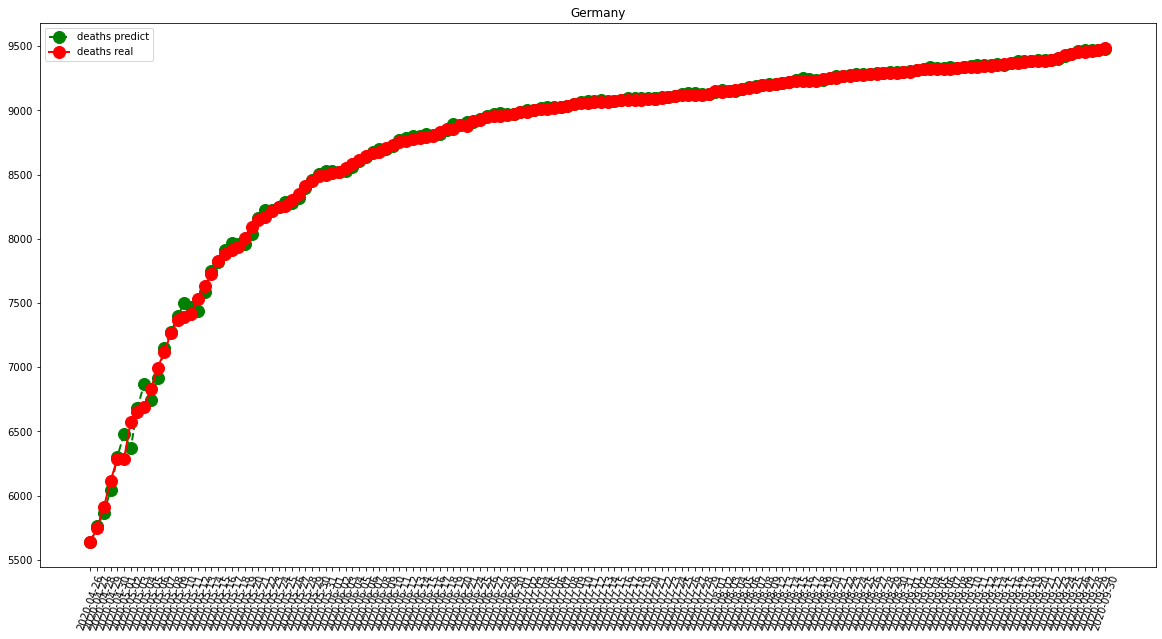

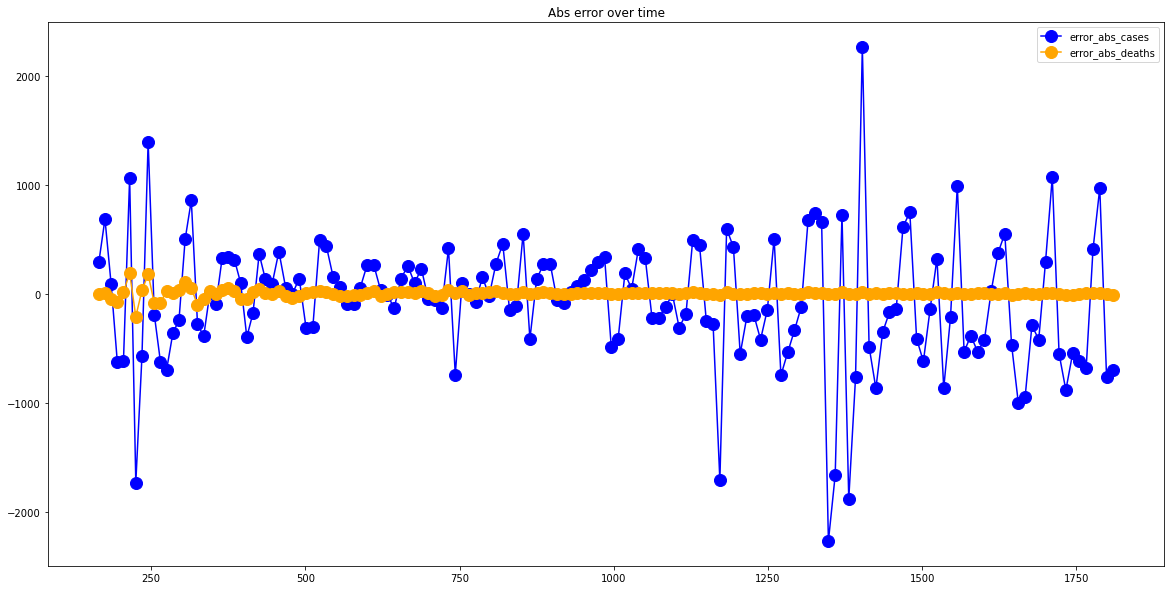

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  854.1111111111111
RMSE =  1202.1173776060655
-- Iran performances for deaths --
MAE =  50.18300653594771
RMSE =  83.05750429436128


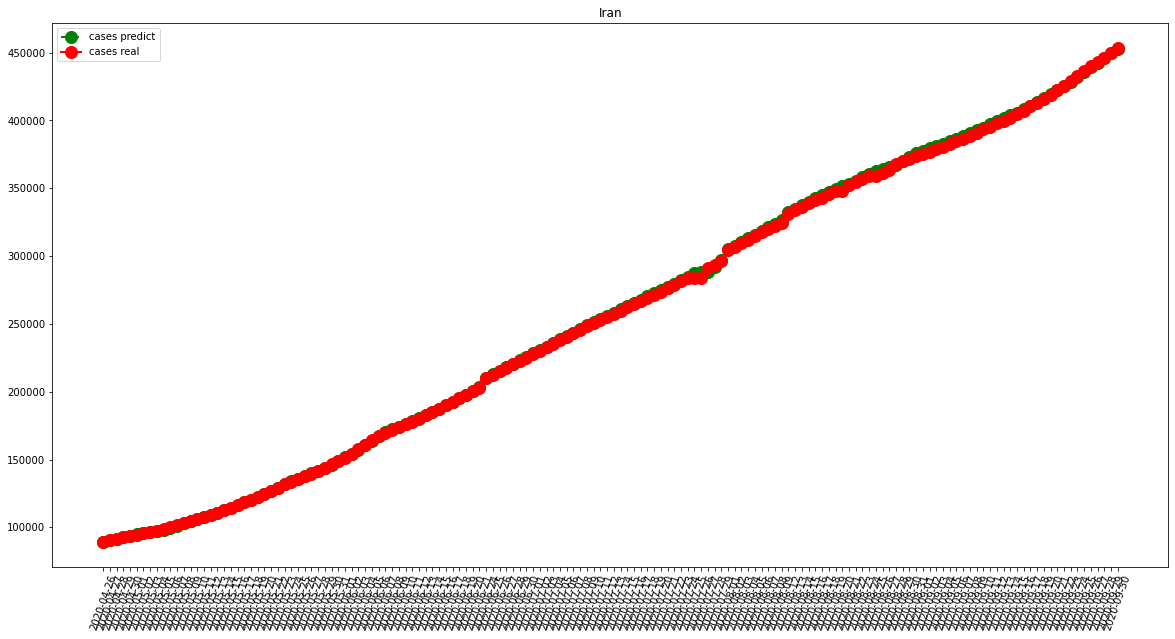

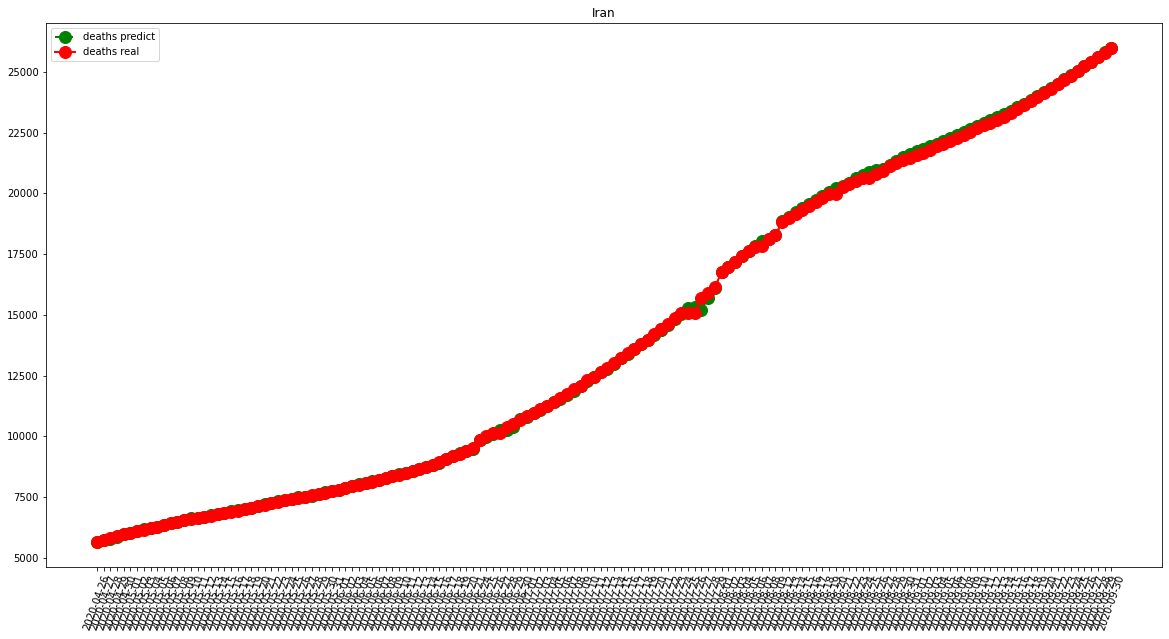

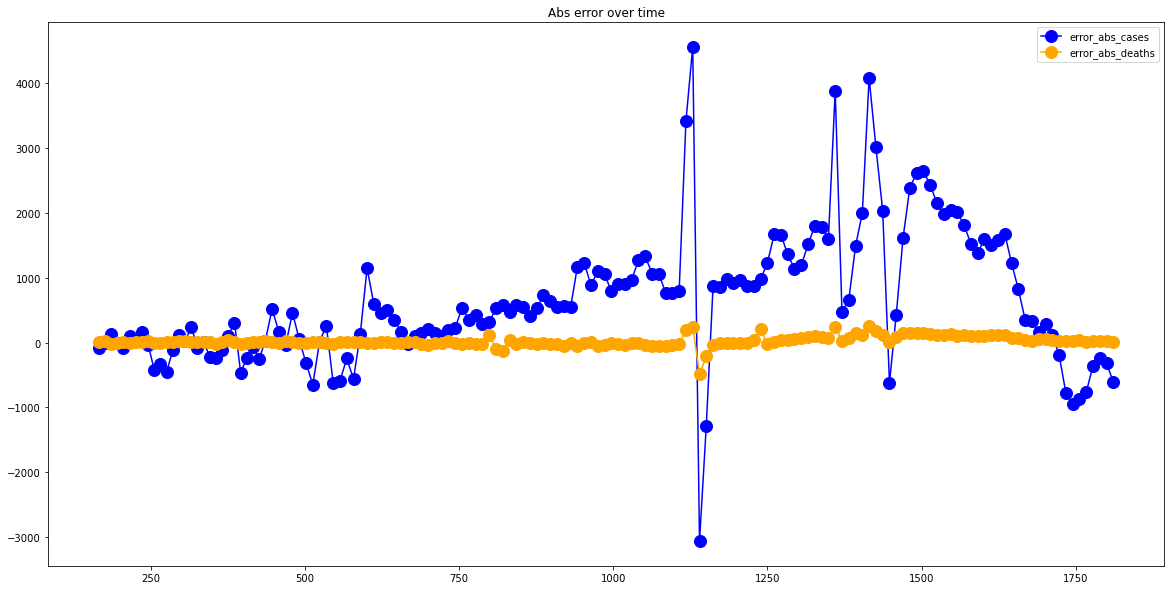

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  226.281045751634
RMSE =  330.6600153505621
-- Turkey performances for deaths --
MAE =  15.745098039215685
RMSE =  82.3458750469925


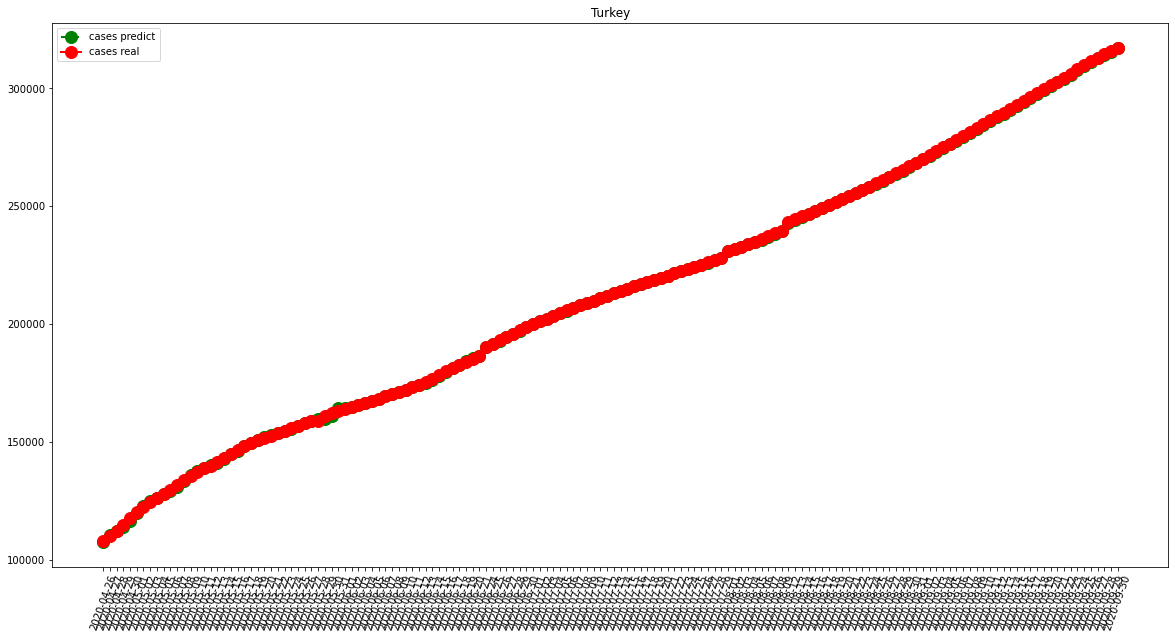

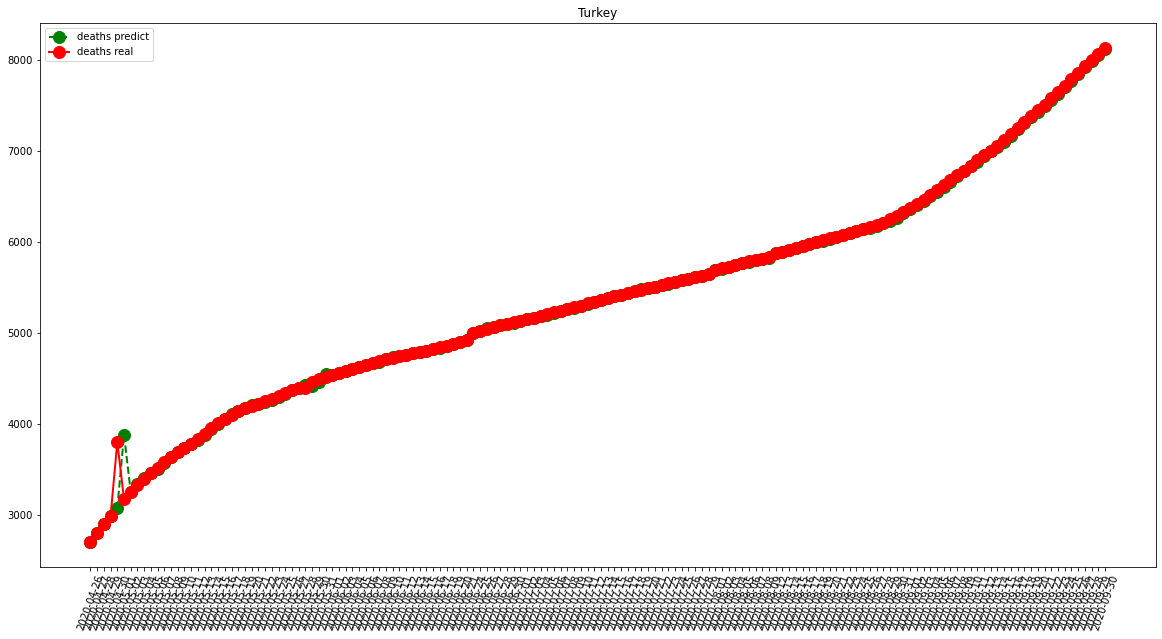

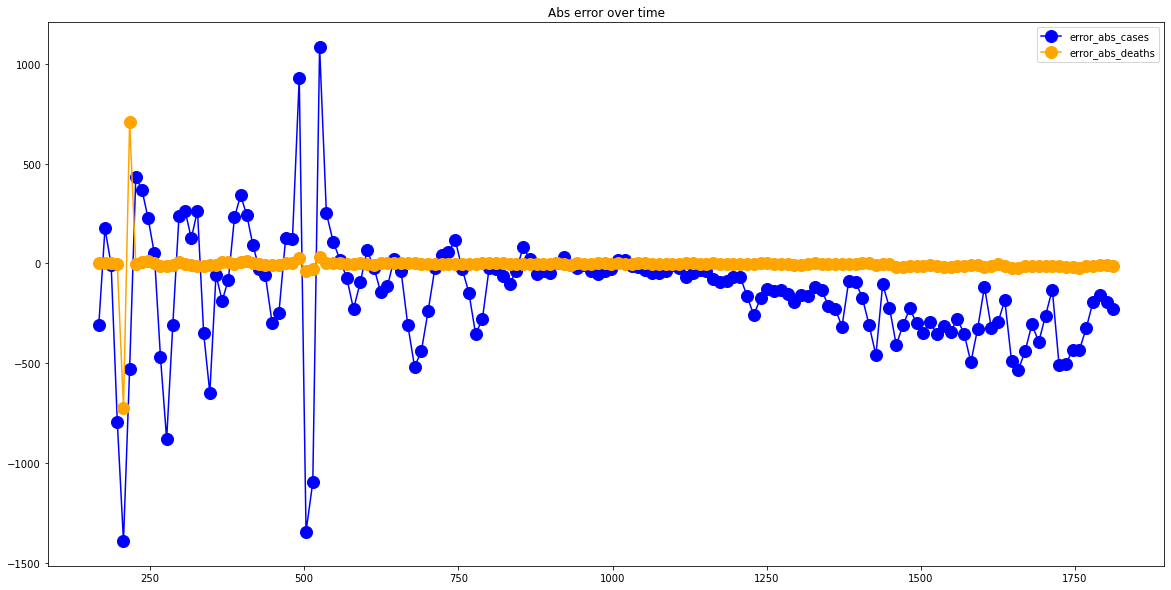

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17396.722222222223
RMSE =  22523.30736324852
-- Brazil performances for deaths --
MAE =  510.07936507936506
RMSE =  614.7539835718516


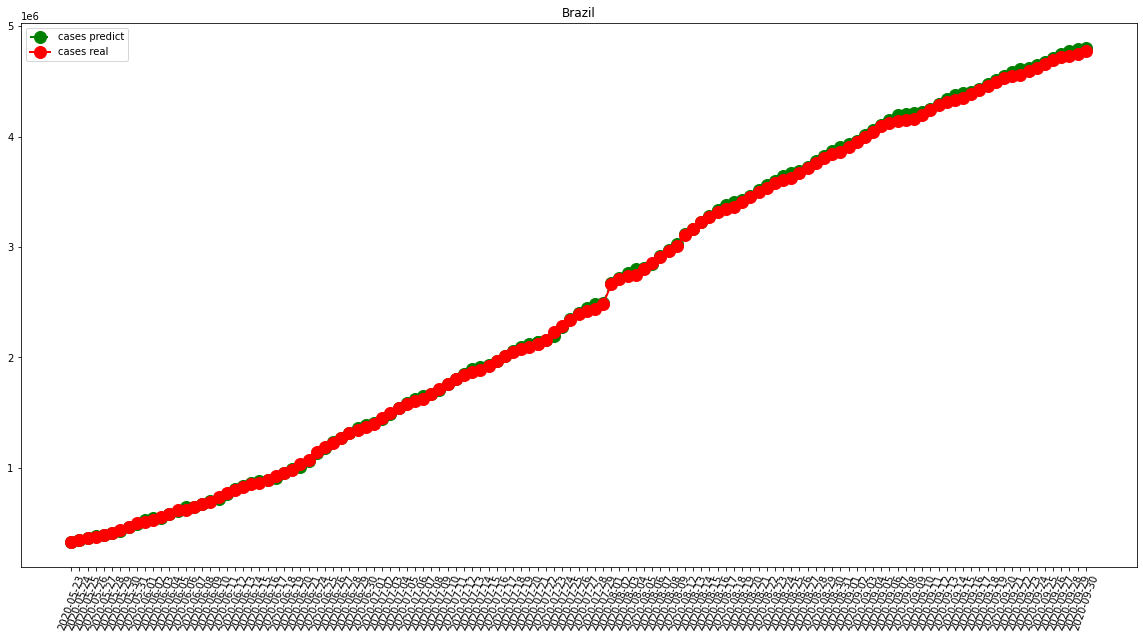

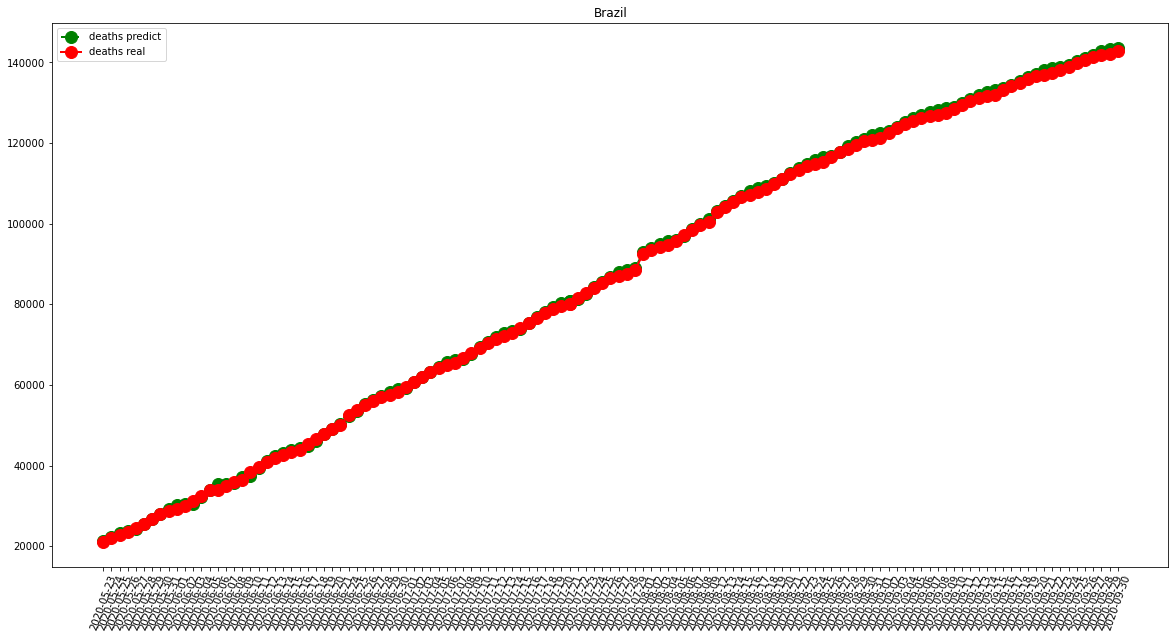

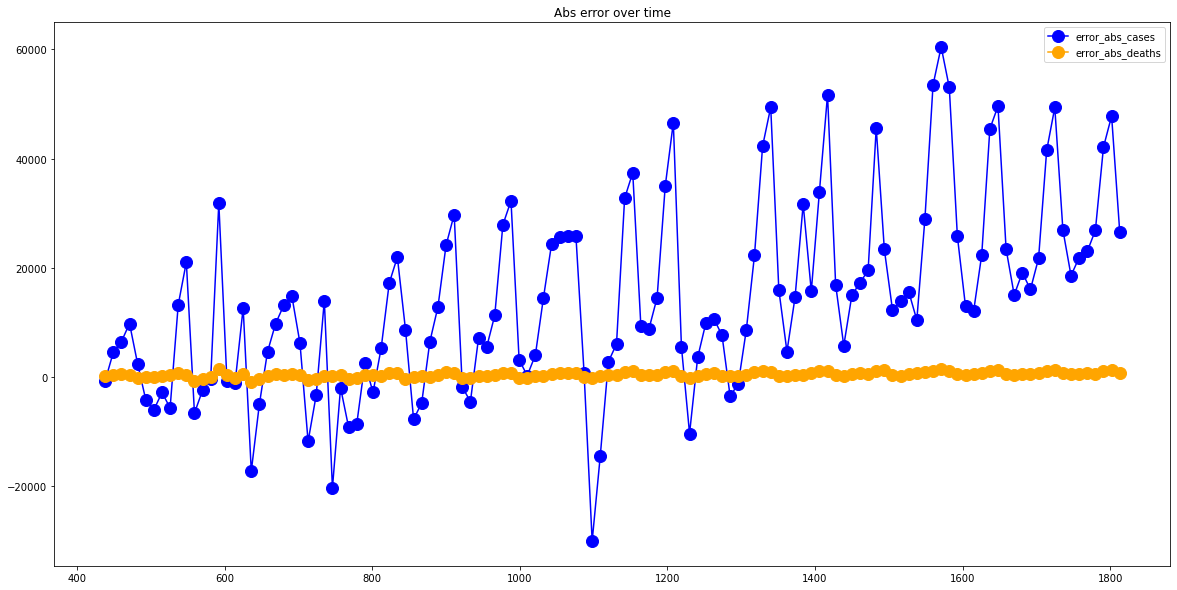

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)